In [1]:
from rbibm.plots.main_plots import plot_adversarial_posterior_predictive, plot_adversarial_posterior
from rbibm.utils.utils_data import load_posterior_samples_by_id, get_model_by_id, get_adversarial_examples_by_id, query, get_model_by_idx, query_main, remove_entry_by_id
from rbibm.plots.metric_plots import plot_rob_tolerance_plot, plot_expected_coverage
from rbibm.plots.multi_plots import multi_plot

from rbibm.plots.styles import use_style
from rbibm.tasks import HHTask
import torch

import matplotlib.pyplot as plt

In [2]:
name = "vae"

In [3]:
color_map_eps = {0.: "#252525", 0.1: "#feb24c", 0.2:"#fd8d3c", 0.3: "#fc4e2a", 0.5:"#e31a1c", 1.: "#bd0026", 2.:"#800026" }
color_map_N_train = {1000.: "#78c679", 10000.: "#238443", 100000.: "#004529"}
color_map_attack = {"L2PGDAttack": "#023858", "L2UniformNoiseAttack": "#a6bddb"}

In [4]:
color_map_defenses0 = {"FIMTraceRegularizer": "#8856a7"}
color_map_defenses1 = {"FIMTraceRegularizer": "#e6a6ed", "FIMLargestEigenvalueRegularizer": "#410466"}

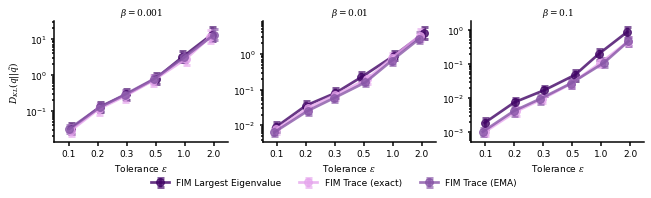

In [6]:
with use_style("pyloric"):
    fig, axes = plt.subplots(1, 3, figsize=(9,2.5))


    _, ax = plot_rob_tolerance_plot(name, hue="defense", params_defense_algorithm="jac_exact", params_defense_beta=0.001, ax=axes[0], jitter=True, alpha=0.8, color_map=color_map_defenses1)
    ax.legend_ = None
    _, ax = plot_rob_tolerance_plot(name, hue="defense", params_defense_algorithm="ema",  ax=axes[0], params_defense_beta=0.001, jitter=True, alpha=0.8, color_map=color_map_defenses0)
    ax.legend_ = None
    ax.set_ylabel(None)

    _, ax = plot_rob_tolerance_plot(name, hue="defense", params_defense_algorithm="jac_exact", params_defense_beta=0.01, ax=axes[1], jitter=True, alpha=0.8, color_map=color_map_defenses1)
    ax.legend_ = None
    _, ax = plot_rob_tolerance_plot(name, hue="defense", params_defense_algorithm="ema",  ax=axes[1], params_defense_beta=0.01, jitter=True, alpha=0.8, color_map=color_map_defenses0)
    ax.legend_ = None
    ax.set_ylabel(None)
    _, ax = plot_rob_tolerance_plot(name, hue="defense", params_defense_algorithm="jac_exact", params_defense_beta=0.1, ax=axes[2], jitter=True, alpha=0.8, color_map=color_map_defenses1)
    ax.legend_ = None
    _, ax = plot_rob_tolerance_plot(name, hue="defense", params_defense_algorithm="ema", ax=axes[2], params_defense_beta=0.1, jitter=True, alpha=0.8, color_map=color_map_defenses0)
    ax.legend_ = None
    ax.set_ylabel(None)

    axes[0].set_ylabel(r"$D_{KL}(q||\tilde{q})$")
    axes[0].set_title(r"$\beta=0.001$")
    axes[1].set_title(r"$\beta=0.01$")
    axes[2].set_title(r"$\beta=0.1$")
    fig.legend(["FIM Largest Eigenvalue", "FIM Trace (exact)", "FIM Trace (EMA)"], ncol=3, bbox_to_anchor=[0.8, 0.05])
    fig.tight_layout()
    fig.savefig("appendix_rob_fim_approx")

Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['0681eb42-7ae8-4f2f-97df-cd012894f393']
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['82574463-0d70-4b0d-a45a-52ee574a9ffc']
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['6f80453b-4e4d-4cb6-8cb7-33ebb7a471e2']
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['f384a82e-5d83-4cb6-8a70-485eeb9cebba']
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['6bcf6d35-158f-4f4a-8e6f-71d5a618935a']
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['59e29c18-d11a-420b-9e1d-59e7cac58e8c']
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['76fb6683-47a8-4436-bc36-c95833780434']

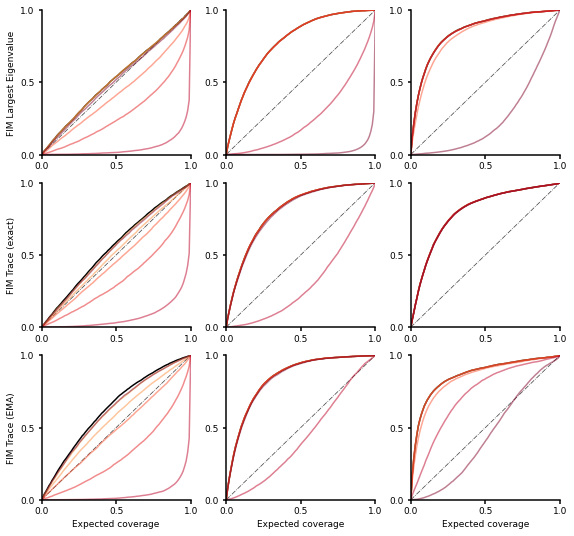

In [7]:
with use_style("pyloric"):
    fig, axes = plt.subplots(3, 3, figsize=(8,7.5))
    i = 0
    for beta in [0.001, 0.01, 0.1]:
        ax = axes[0, i]
        _, ax = plot_expected_coverage(name, defense="FIMLargestEigenvalueRegularizer", hue="eps",with_eps=True, params_defense_beta=beta, color_map=color_map_eps, with_grid=False, ax=ax)
        ax.legend_ = None
        i += 1
        ax.set_xlabel(None)
        if i > 1:
            ax.set_ylabel(None)
        else:
            ax.set_ylabel("FIM Largest Eigenvalue")

    i = 0
    for beta in [0.001, 0.01, 0.1]:
        ax = axes[1, i]
        _, ax = plot_expected_coverage(name, defense="FIMTraceRegularizer", hue="eps",with_eps=True,params_defense_algorithm="jac_exact", params_defense_beta=beta, color_map=color_map_eps, with_grid=False, ax=ax)
        ax.legend_ = None
        i += 1
        ax.set_xlabel(None)
        if i > 1:
            ax.set_ylabel(None)
        else:
            ax.set_ylabel("FIM Trace (exact)")


    i = 0
    for beta in [0.001, 0.01, 0.1]:
        ax = axes[2, i]
        _, ax = plot_expected_coverage(name, defense="FIMTraceRegularizer", hue="eps",with_eps=True,params_defense_algorithm="ema", params_defense_beta=beta, color_map=color_map_eps, with_grid=False, ax=ax)
        ax.legend_ = None
        i += 1
        if i > 1:
            ax.set_ylabel(None)
        else:
            ax.set_ylabel("FIM Trace (EMA)")

    fig.tight_layout()
    fig.savefig("appendix_expected_coverage_fim_approx")

Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['0681eb42-7ae8-4f2f-97df-cd012894f393']


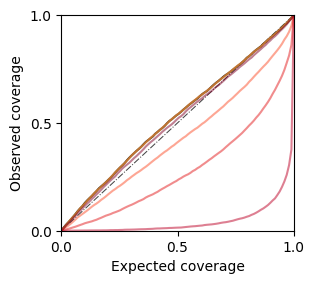

In [8]:
fig, ax = plot_expected_coverage(name, defense="FIMLargestEigenvalueRegularizer", hue="eps",with_eps=True, params_defense_beta=0.001, color_map=color_map_eps, with_grid=False)
ax.legend_ = None

Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['ee0bdfec-2378-4125-aece-34f47e359517']


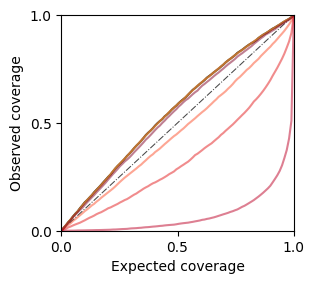

In [ ]:
fig, ax = plot_expected_coverage(name, defense="FIMTraceRegularizer", hue="eps",with_eps=True, params_defense_beta=0.001,params_defense_algorithm="jac_exact", color_map=color_map_eps, with_grid=False)
ax.legend_ = None

Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['9b426437-ffc0-438e-8b2f-34185601a82a']


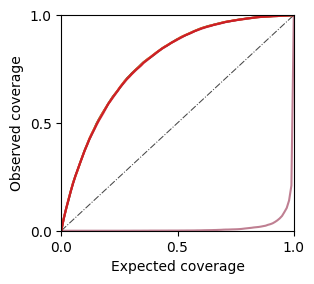

In [ ]:
fig, ax = plot_expected_coverage(name, defense="FIMLargestEigenvalueRegularizer", hue="eps",with_eps=True, params_defense_beta=0.01, color_map=color_map_eps, with_grid=False)
ax.legend_ = None

Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['f54776ee-5a14-4807-80d1-d651c5d4c969']


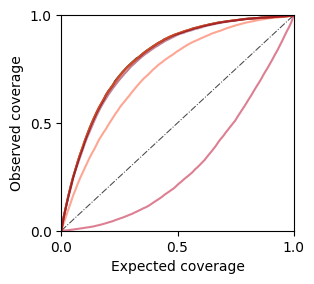

In [ ]:
fig, ax = plot_expected_coverage(name, defense="FIMTraceRegularizer", hue="eps",with_eps=True, params_defense_beta=0.01,params_defense_algorithm="jac_exact", color_map=color_map_eps, with_grid=False)
ax.legend_ = None

In [ ]:
?plot_expected_coverage

Signature:
plot_expected_coverage(
    name: str,
    task: Optional[str] = None,
    model_name: Optional[str] = None,
    defense: Optional[str] = None,
    loss: Optional[str] = None,
    hue: Optional[str] = None,
    with_eps: bool = True,
    verbose: bool = True,
    color_map=None,
    with_grid=True,
    ax=None,
    **kwargs,
)
Docstring: <no docstring>
File:      /mnt/qb/home/macke/mgloeckler90/rbibm/rbibm/plots/metric_plots.py
Type:      function
